<a href="https://colab.research.google.com/github/QuantAnalyticsTorch/quant_analytics_torch/blob/main/examples/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import torch

In [168]:
import numpy as np

In [169]:
x = torch.randn(size=(100,2))

In [170]:
rho = 0.95
rhobar = np.sqrt(1-rho**2)

y = rho*x[:,0] + rhobar*x[:,1]

In [171]:
import matplotlib.pyplot as plt

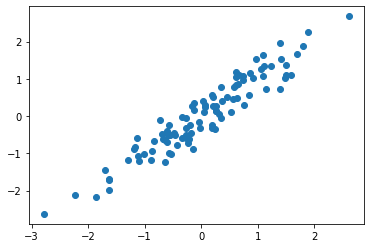

In [172]:
plt.scatter(x[:,0],y)

In [201]:
class LinearRegression(torch.nn.Module):  # inheriting from nn.Module!

    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()

        self.regressor = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
      return self.regressor(x)

In [202]:
model = LinearRegression(1)

In [213]:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer = torch.optim.LBFGS(model.parameters(), max_iter=1)

In [214]:
criterion = torch.nn.MSELoss() 

for i in range(1):
  def closure():
    optimizer.zero_grad()
    z = model.forward(x[:,0:1])
    loss = criterion(z[:,0],y)
    loss.backward()
    return loss
  optimizer.step(closure)
  print(loss)

tensor(0.1027, grad_fn=<MseLossBackward>)


In [215]:
b = model.forward(x[:,0:1])

In [216]:
print(b[:,0])

tensor([-0.1479,  0.7371, -0.4585,  0.7700,  0.9151, -1.8579, -2.2262,  0.7400,
        -0.2083,  0.6225,  0.6136, -1.6960, -0.3306, -0.2621,  0.2013,  1.2336,
         1.0984,  0.1987, -0.5762,  1.7078,  0.2744,  0.5766, -0.8344, -0.5700,
        -1.0164,  0.6483,  0.8648,  0.2115,  0.6300, -0.1536,  0.3604, -0.7291,
         0.2746, -0.8658,  1.4085, -0.1243, -0.6769,  0.6729, -0.0300,  0.3287,
        -1.1417,  1.0572, -1.6278, -0.2691, -0.2000,  0.5879, -0.6403, -0.2563,
         0.4547,  1.5054,  0.6360, -0.5717,  0.2053, -1.6310,  1.1161, -0.2236,
        -1.0957,  0.0366,  1.4836, -0.0127,  1.5954,  1.4011, -0.5547, -0.5719,
        -0.1185,  1.8079, -1.1181, -0.4154, -0.4776, -0.1765,  0.9795, -1.2932,
         0.5308, -0.2718, -0.6854,  0.0693,  0.2622,  1.8998,  0.3522,  2.6163,
         0.3695,  0.2479,  0.1891, -2.7788,  1.0972, -1.1923, -0.5976, -0.3390,
         0.0497, -1.6307, -0.5992,  1.4251, -0.6422, -1.1748,  0.8440,  1.1462,
         1.5132, -0.8836,  0.0752, -0.52

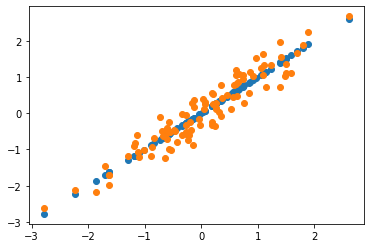

In [217]:
plt.scatter(x[:,0], b.detach().numpy())
plt.scatter(x[:,0], y)
